<a href="https://colab.research.google.com/github/tumblingdice512/Research/blob/master/model5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn.functional as f
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
N = 10
L = 5

In [75]:
import numpy as np
np.random.seed(100)

In [106]:
S0 = torch.sign(torch.randn(9,N))

SL = torch.sign(torch.randn(9,N))


M = S0.size()[0]
print(M)
print(N)
print(S0.shape)
print(S0[0].shape)

9
10
torch.Size([9, 10])
torch.Size([10])


In [107]:
alpha = M / N
print(alpha)

0.9


In [108]:
D = torch.Tensor([[1,2,3],[2,3,4]])
print(D)
print(D.shape)
print("M:",D.size()[0]) #M
print("N:",D.size()[1]) #N

tensor([[1., 2., 3.],
        [2., 3., 4.]])
torch.Size([2, 3])
M: 2
N: 3


In [109]:
def spin_overlap(x,y):
  spin_overlap = 0
  for i in range (len(x[0])) :

    spin_overlap = spin_overlap + torch.dot(x.T[i],y.T[i])
  return torch.abs(spin_overlap/(x.size()[0]*x.size()[1]))

print(spin_overlap(S0,S0))


tensor(1.)


In [110]:
def bond_overlap(x,y):
  bond_overlap = 0
  for i in range (len(x[0])) :

    bond_overlap = bond_overlap + torch.dot(x.T[i],y.T[i])
  return torch.abs(bond_overlap/(x.size()[0]*x.size()[1]))

In [111]:
S_a = torch.Tensor([[1,-1],[-1,1],[1,-1]])
S_b = torch.Tensor([[1,-1],[1,1],[1,1]])
print(spin_overlap(S_a,S_b))
print(spin_overlap(S_a,S_a))

tensor(0.3333)
tensor(1.)


In [112]:
a1 = torch.dot(S_a.T[0],S_b.T[0])
a2 = torch.dot(S_a.T[1],S_b.T[1])
a3 = (a1 + a2)/(2*3)
print(a3)

tensor(0.3333)


In [113]:
def MSE(t, y):
    mse = torch.mean(torch.sum(torch.square(t-y),axis = 1),axis = 0)
    return mse

In [114]:
print(MSE(S0,SL))

tensor(21.7778)


In [115]:
A = torch.Tensor([[3,5,1],[4,12,1]])
print(A**2)
A_norm = (torch.sum(torch.square(A),axis=0))**(1/2)

A_normalized = A / A_norm
A_normalized_2 = A / A_norm * (N**(1/2))

print(A_norm)

print(A_normalized)
print(A_normalized_2)

tensor([[  9.,  25.,   1.],
        [ 16., 144.,   1.]])
tensor([ 5.0000, 13.0000,  1.4142])
tensor([[0.6000, 0.3846, 0.7071],
        [0.8000, 0.9231, 0.7071]])
tensor([[1.8974, 1.2163, 2.2361],
        [2.5298, 2.9190, 2.2361]])


In [116]:
def weight_norm(x):
    x_norm = (torch.sum(torch.square(x),axis=0)**(1/2))
    return x_norm

In [117]:
w_a = torch.Tensor([[1,0,1],[1,0,0],[0,1,0]]) 
w_b = torch.Tensor([[1,0,0],[0,1,0],[0,0,1]]) 
J_a = w_a / (weight_norm(w_a)) * (3**(1/2))
J_b = w_b / (weight_norm(w_b)) * (3**(1/2))


print(J_a)
print(J_b)
print(len(J_a[0]))

print(bond_overlap(J_a,J_b))
print(bond_overlap(J_a,J_a))

tensor([[1.2247, 0.0000, 1.7321],
        [1.2247, 0.0000, 0.0000],
        [0.0000, 1.7321, 0.0000]])
tensor([[1.7321, 0.0000, 0.0000],
        [0.0000, 1.7321, 0.0000],
        [0.0000, 0.0000, 1.7321]])
3
tensor(0.2357)
tensor(1.)


In [198]:

c = torch.nn.utils.weight_norm(torch.nn.Linear(4, 3, False), name='weight',dim=0)
#計算の際にはcの転置を用いる。正規化は、dim=0で行う必要あり。
print(c.weight)
print(c.weight_g)
d = c.weight/c.weight_g
print(d)
print(c.weight_v.size())

tensor([[-0.3890, -0.3086,  0.2792,  0.2356],
        [ 0.4383, -0.3489, -0.4130, -0.1809],
        [-0.3426, -0.0646,  0.2575, -0.4336]], grad_fn=<MulBackward0>)
Parameter containing:
tensor([[0.6164],
        [0.7191],
        [0.6130]], requires_grad=True)
tensor([[-0.6310, -0.5006,  0.4529,  0.3821],
        [ 0.6095, -0.4852, -0.5743, -0.2515],
        [-0.5588, -0.1054,  0.4200, -0.7073]], grad_fn=<DivBackward0>)
torch.Size([3, 4])


In [170]:
print(torch.dot(torch.tensor([-0.7766,  0.1530,  0.4038, -0.4588]),torch.tensor([-0.7766,  0.1530,  0.4038, -0.4588]))**(1/2))

tensor(1.0000)


In [171]:
print(torch.dot(torch.tensor([-0.0904, -0.2665,  0.3962, -0.8740]),torch.tensor([-0.0904, -0.2665,  0.3962, -0.8740]))**(1/2))

tensor(1.0000)


In [172]:
print(torch.dot(torch.tensor([-0.6091, -0.4947,  0.6101,  0.1093]),torch.tensor([-0.6091, -0.4947,  0.6101,  0.1093]))**(1/2))

tensor(0.9999)


In [189]:
class Network1(torch.nn.Module):
    def __init__(self):
        super(Network1, self).__init__()
        self.fc1_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc2_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc3_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc4_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)
        self.fc5_1 = torch.nn.utils.weight_norm(torch.nn.Linear(N, N, False), name='weight',dim=0)

        
    def forward(self, x):
        x = torch.tanh(self.fc1_1(x))
        S1_1 = torch.sign(x)
        x = torch.tanh(self.fc2_1(x))
        S2_1 = torch.sign(x)
        x = torch.tanh(self.fc3_1(x))
        S3_1 = torch.sign(x)
        x = torch.tanh(self.fc4_1(x))
        S4_1 = torch.sign(x)
        x = torch.tanh(self.fc5_1(x))
        S5_1 = torch.sign(x)

        return x, S1_1, S2_1, S3_1, S4_1, S5_1, self.fc1_1, self.fc2_1, self.fc3_1, self.fc4_1, self.fc5_1, self.fc1_1.weight_g, self.fc2_1.weight_g, self.fc3_1.weight_g, self.fc4_1.weight_g, self.fc5_1.weight_g



In [190]:
if __name__ == '__main__':
    # 学習回数
    n_epoch = 5000
 
    # 学習結果の保存用
    history = {
        'train_loss_1': [],
    }
 
    # ネットワークを構築
    net: torch.nn.Module = Network1()
 
    optimizer = torch.optim.SGD(params=net.parameters(), lr=0.01)
 
    for n in range(n_epoch):
 
        """ Training Part"""
        loss = None
        # 学習開始 (再開)
        net.train(True)  # 引数は省略可能
 
        optimizer.zero_grad()
        output = net(S0)
        loss = MSE(output[0], SL)
        #loss_function = torch.nn.MSELoss()
        #loss = loss_function(output[0], SL)
        loss.backward()
        optimizer.step()
 
        print('EPOCH ', n + 1, ' | train_loss_1 ',loss)
        
 
        history['train_loss_1'].append(loss)


ストリーミング出力は最後の 5000 行に切り捨てられました。
EPOCH  5001  | train_loss_1  tensor(0.0190, grad_fn=<MeanBackward1>)
EPOCH  5002  | train_loss_1  tensor(0.0190, grad_fn=<MeanBackward1>)
EPOCH  5003  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5004  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5005  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5006  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5007  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5008  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5009  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5010  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5011  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5012  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5013  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EPOCH  5014  | train_loss_1  tensor(0.0189, grad_fn=<MeanBackward1>)
EP

{'train_loss_1': [tensor(10.1513, grad_fn=<MeanBackward1>), tensor(10.1395, grad_fn=<MeanBackward1>), tensor(10.1280, grad_fn=<MeanBackward1>), tensor(10.1168, grad_fn=<MeanBackward1>), tensor(10.1060, grad_fn=<MeanBackward1>), tensor(10.0954, grad_fn=<MeanBackward1>), tensor(10.0850, grad_fn=<MeanBackward1>), tensor(10.0748, grad_fn=<MeanBackward1>), tensor(10.0649, grad_fn=<MeanBackward1>), tensor(10.0550, grad_fn=<MeanBackward1>), tensor(10.0453, grad_fn=<MeanBackward1>), tensor(10.0357, grad_fn=<MeanBackward1>), tensor(10.0262, grad_fn=<MeanBackward1>), tensor(10.0168, grad_fn=<MeanBackward1>), tensor(10.0074, grad_fn=<MeanBackward1>), tensor(9.9980, grad_fn=<MeanBackward1>), tensor(9.9887, grad_fn=<MeanBackward1>), tensor(9.9793, grad_fn=<MeanBackward1>), tensor(9.9699, grad_fn=<MeanBackward1>), tensor(9.9604, grad_fn=<MeanBackward1>), tensor(9.9509, grad_fn=<MeanBackward1>), tensor(9.9413, grad_fn=<MeanBackward1>), tensor(9.9316, grad_fn=<MeanBackward1>), tensor(9.9218, grad_fn=<

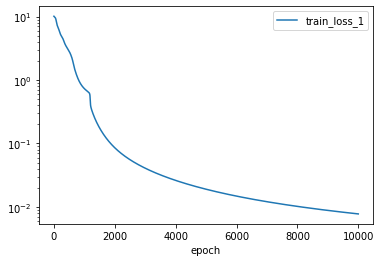

In [191]:
# 結果の出力と描画
print(history)
plt.figure()
plt.plot(range(1, n_epoch+1), history['train_loss_1'], label='train_loss_1')
plt.xlabel('epoch')
plt.legend()
plt.yscale("log")
plt.savefig('loss.png')



In [192]:
print(spin_overlap(output[5], SL))

tensor(1., grad_fn=<AbsBackward>)


In [193]:
print(output[12])

Parameter containing:
tensor([[1.3118],
        [1.2328],
        [1.2221],
        [1.0616],
        [0.9862],
        [1.0133],
        [0.8776],
        [1.2929],
        [0.9455],
        [1.1072]], requires_grad=True)


In [209]:
print(output[7].weight)
J1_1 = N**(1/2) * output[7].weight/output[12]
print(J1_1)

tensor([[ 1.0579, -0.0177,  0.1151,  0.3477,  0.2385, -0.5059,  0.2212, -0.0434,
         -0.3189, -0.0421],
        [ 0.0573,  0.4266,  0.3610,  0.5245,  0.5233,  0.5618,  0.4044,  0.2978,
         -0.2942, -0.0284],
        [-0.1893, -0.3236, -0.2194, -0.0720, -0.3154,  0.0508,  0.3907, -0.2246,
          0.7569, -0.6493],
        [ 0.5170,  0.3353,  0.1008,  0.4710,  0.4137,  0.1904,  0.3949,  0.1703,
         -0.2544,  0.2414],
        [ 0.1116, -0.3730,  0.0717,  0.3386, -0.0039,  0.0094,  0.6564,  0.0417,
          0.1847, -0.4841],
        [ 0.4214, -0.1926, -0.1234,  0.1112, -0.1939, -0.7876, -0.0012, -0.1020,
         -0.2683,  0.2103],
        [ 0.1312, -0.5046, -0.2113,  0.2442,  0.0491, -0.1466,  0.5784,  0.1822,
         -0.0431, -0.0248],
        [ 0.2949, -0.1689,  0.1040, -0.1412, -0.0867, -0.6783, -0.6353,  0.1572,
         -0.5865,  0.5343],
        [-0.5664,  0.2723,  0.0953, -0.0254,  0.0235,  0.5111, -0.3316,  0.2472,
          0.0477,  0.2325],
        [-0.2995, -

In [210]:
print(J1_1[0])

tensor([ 2.5503, -0.0426,  0.2774,  0.8381,  0.5749, -1.2196,  0.5333, -0.1046,
        -0.7689, -0.1015], grad_fn=<SelectBackward>)


In [211]:
print(torch.dot(torch.tensor([ 2.5503, -0.0426,  0.2774,  0.8381,  0.5749, -1.2196,  0.5333, -0.1046,
         -0.7689, -0.1015]),torch.tensor([ 2.5503, -0.0426,  0.2774,  0.8381,  0.5749, -1.2196,  0.5333, -0.1046,
         -0.7689, -0.1015])))

tensor(10.)
